# Analysing Expense

In [138]:
##Calculating Category wise total budget amount and storing it in DataFrame

#Create an empty dictionary to store DataFrames for each year
category_dfs_ak = []

#Iterating it through all years
for year in years:
    budget_df = globals()[f"budget{year}_df_exp"]
    category_df = budget_df.groupby("Category Name")[f"Budgeted amount {year}"].sum().reset_index()
    category_dfs_ak.append(category_df)


In [139]:
##Merging the Category wise Expense Amount Dataframe to a single Dataframe

# Merge category_df_2019_ak and category_df_2020_ak on "Category Name"
merged_df_ak = pd.merge(category_dfs_ak[0], category_dfs_ak[1], on="Category Name", how="outer")

# Merge the result with category_df_2021 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_dfs_ak[2], on="Category Name", how="outer")

# Merge the result with category_df_2022 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_dfs_ak[3], on="Category Name", how="outer")

# Merge the result with category_df_2023 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_dfs_ak[4], on="Category Name", how="outer")

merged_df_ak

,Category Name,Budgeted amount 2019,Budgeted amount 2020,Budgeted amount 2021,Budgeted amount 2022,Budgeted amount 2023
0,Contribution To Capital,3.434535e+08,3.434555e+08,3.495350e+08,3.477590e+08,3.454875e+08
1,Contribution To Reserves/Reserve Funds,1.374326e+09,1.492208e+09,1.569495e+09,6.790572e+08,8.177363e+08
2,Equipment,6.256912e+07,6.305564e+07,6.305676e+07,6.962870e+07,7.491960e+07
3,Inter-Divisional Charges,3.161485e+08,1.569948e+08,NaN,3.124781e+08,3.197343e+08
4,Materials & Supplies,7.350229e+08,7.344638e+08,8.132793e+08,8.103749e+08,8.393636e+08
5,Other Expenditures,2.711142e+09,2.611534e+09,2.835059e+09,2.776243e+09,3.063181e+09
6,Salaries And Benefits,5.928046e+09,6.092481e+09,NaN,NaN,NaN
7,Service And Rent,2.082853e+09,2.178262e+09,2.342040e+09,2.632925e+09,3.071138e+09
8,Benefits,NaN,NaN,1.450706e+09,1.488014e+09,1.586110e+09
9,Salaries,NaN,NaN,4.781880e+09,5.108580e+09,5.313474e+09


In [140]:
# Rounding off the Expense amount to millions (10^6)

# Define a function to divide numbers by 10^6 and round to 3 decimal places
divide_and_round_ak = lambda x: round(float(x) / 1e6, 2) if pd.to_numeric(x, errors='coerce') == x else str(x)

# Apply the division and rounding function to all columns in the DataFrame
merged_df_ak_final = merged_df_ak.applymap(divide_and_round_ak)

#Renaming the column as Expense and year
merged_df_ak_final=merged_df_ak_final.rename(columns={
      "Category Name":"Category Name",
      "Budgeted amount 2019":"Expense 2019(millions)",
      "Budgeted amount 2020":"Expense 2020(millions)",
      "Budgeted amount 2021":"Expense 2021(millions)",
      "Budgeted amount 2022":"Expense 2022(millions)",
      "Budgeted amount 2023":"Expense 2023(millions)"
    
})
merged_df_ak_final

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
0,Contribution To Capital,343.45,343.46,349.53,347.76,345.49
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.5,679.06,817.74
2,Equipment,62.57,63.06,63.06,69.63,74.92
3,Inter-Divisional Charges,316.15,156.99,nan,312.48,319.73
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
6,Salaries And Benefits,5928.05,6092.48,nan,nan,nan
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14
8,Benefits,nan,nan,1450.71,1488.01,1586.11
9,Salaries,nan,nan,4781.88,5108.58,5313.47


In [141]:
##Data Cleaning for above Expense Dataframe

# Replace 'nan' strings with actual NaN values
merged_df_ak_final.replace('nan', pd.NA, inplace=True)

# Replace NaN values with 0
merged_df_ak_final.fillna(0, inplace=True)

# Adding Salaries And Benefits for year 2021,2022,2023
salaries_2021 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2021(millions)'].sum()
salaries_2022 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2022(millions)'].sum()
salaries_2023 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2023(millions)'].sum()

# Update the "Salaries And Benefits" column from above value for year 2021,2022,2023
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Expense 2021(millions)'] = salaries_2021
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Expense 2022(millions)'] = salaries_2022
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Expense 2023(millions)'] = salaries_2023

#Drop the last two columns since the value was already aaded up in column no 6
merged_df_ak_final=merged_df_ak_final.drop([8,9])
merged_df_ak_final

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
0,Contribution To Capital,343.45,343.46,349.53,347.76,345.49
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.50,679.06,817.74
2,Equipment,62.57,63.06,63.06,69.63,74.92
3,Inter-Divisional Charges,316.15,156.99,0.00,312.48,319.73
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
6,Salaries And Benefits,5928.05,6092.48,6232.59,6596.59,6899.58
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14


In [142]:
##Adding all categories indivisually year wise and 
##sorting it based on total, so that highest expense category is on top

# Extract the non-numeric columns (assuming the first column is non-numeric)
non_numeric_columns = merged_df_ak_final.columns[1:]

# Convert non-numeric values to NaN and then sum each row
merged_df_ak_final['Total'] = merged_df_ak_final[non_numeric_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Sort the DataFrame based on the "Total" column in descending order
merged_df_ak_final = merged_df_ak_final.sort_values("Total", ascending=False)

# Display the updated and sorted DataFrame
merged_df_ak_final=merged_df_ak_final.drop(['Total'], axis=1)

merged_df_ak_final

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
6,Salaries And Benefits,5928.05,6092.48,6232.59,6596.59,6899.58
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.50,679.06,817.74
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
0,Contribution To Capital,343.45,343.46,349.53,347.76,345.49
3,Inter-Divisional Charges,316.15,156.99,0.00,312.48,319.73
2,Equipment,62.57,63.06,63.06,69.63,74.92


In [179]:
##Analysing the year wise total expense(in million)

for year in years:
    column_name = f"Expense {year}(millions)"
    merged_df_ak_final[column_name] = pd.to_numeric(merged_df_ak_final[column_name], errors='coerce')

total_2019_ak = merged_df_ak_final["Expense 2019(millions)"].sum()
total_2020_ak = merged_df_ak_final["Expense 2020(millions)"].sum()
total_2021_ak = merged_df_ak_final["Expense 2021(millions)"].sum()
total_2022_ak = merged_df_ak_final["Expense 2022(millions)"].sum()
total_2023_ak = merged_df_ak_final["Expense 2023(millions)"].sum()

# Create a DataFrame with the totals
total_df_ak = pd.DataFrame([
    {"Year": "2019", "Total Expense(millions)": total_2019_ak},
    {"Year": "2020", "Total Expense(millions)": total_2020_ak},
    {"Year": "2021", "Total Expense(millions)": total_2021_ak},
    {"Year": "2022", "Total Expense(millions)": total_2022_ak},
    {"Year": "2023", "Total Expense(millions)": total_2023_ak}
])

# Calculate percentage change
total_df_ak["Percentage Change"] = round(total_df_ak["Total Expense(millions)"].pct_change() * 100,2)

# Set index as Year and display DataFrame
total_df_ak = total_df_ak.set_index("Year")
total_df_ak

,Total Expense(millions),Percentage Change
Year,,
2019,13553.56,NaN
2020,13672.45,0.88
2021,14205.06,3.90
2022,14225.06,0.14
2023,15431.14,8.48


Text(0, 0.5, 'Total Expense(in millions)')

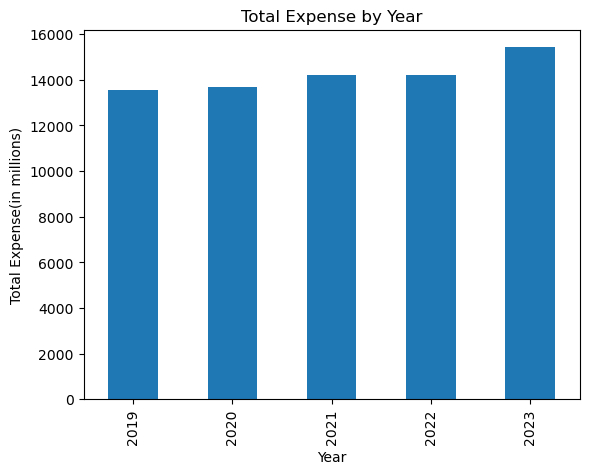

In [144]:
##Bar graph to show yearly change in expense during five years

# Create a bar plot
graph1_ak = total_df_ak.plot(kind="bar", legend=False)

# Set plot title and labels
plt.title("Total Expense by Year")
plt.xlabel("Year")
plt.ylabel("Total Expense(in millions)")

In [181]:
##Highest Expense Category for each year

max_values_ak = []
category_names_ak = []

for year in years:
    max_value_ak = merged_df_ak_final[f"Expense {year}(millions)"].max()
    category_name_ak = merged_df_ak_final.loc[merged_df_ak_final[f"Expense {year}(millions)"].idxmax(), "Category Name"]
    
    max_values_ak.append(max_value_ak)
    category_names_ak.append(category_name_ak)

high_df_ak = pd.DataFrame({
    "Year": years,
    "Highest Category": category_names_ak,
    "Expense Amount": max_values_ak
})

# Calculate percentage change
high_df_ak["Percentage Change"] = round(high_df_ak["Expense Amount"].pct_change() * 100,2)
high_df_ak

,Year,Highest Category,Expense Amount,Percentage Change
0,2019,Salaries And Benefits,5928.05,NaN
1,2020,Salaries And Benefits,6092.48,2.77
2,2021,Salaries And Benefits,6232.59,2.30
3,2022,Salaries And Benefits,6596.59,5.84
4,2023,Salaries And Benefits,6899.58,4.59


In [182]:
##Lowest Expense Category for each year

#Filtering the value which are NaN or 0
filtered_df_ak = merged_df_ak_final.copy()
filtered_df_ak.replace(0, np.nan, inplace=True)

#defining variables
min_values_ak = []
category_names_ak = []

for year in years:
    min_value_ak = filtered_df_ak[f"Expense {year}(millions)"].min()
    category_name_ak = filtered_df_ak.loc[filtered_df_ak[f"Expense {year}(millions)"].idxmin(), "Category Name"]

    min_values_ak.append(min_value_ak)
    category_names_ak.append(category_name_ak)

low_df_ak = pd.DataFrame({
    "Year": years,
    "Lowest Category": category_names_ak,
    "Expense Amount": min_values_ak
})
# Calculate percentage change
low_df_ak["Percentage Change"] = round(low_df_ak["Expense Amount"].pct_change() * 100,2)
low_df_ak

,Year,Lowest Category,Expense Amount,Percentage Change
0,2019,Equipment,62.57,NaN
1,2020,Equipment,63.06,0.78
2,2021,Equipment,63.06,0.00
3,2022,Equipment,69.63,10.42
4,2023,Equipment,74.92,7.60


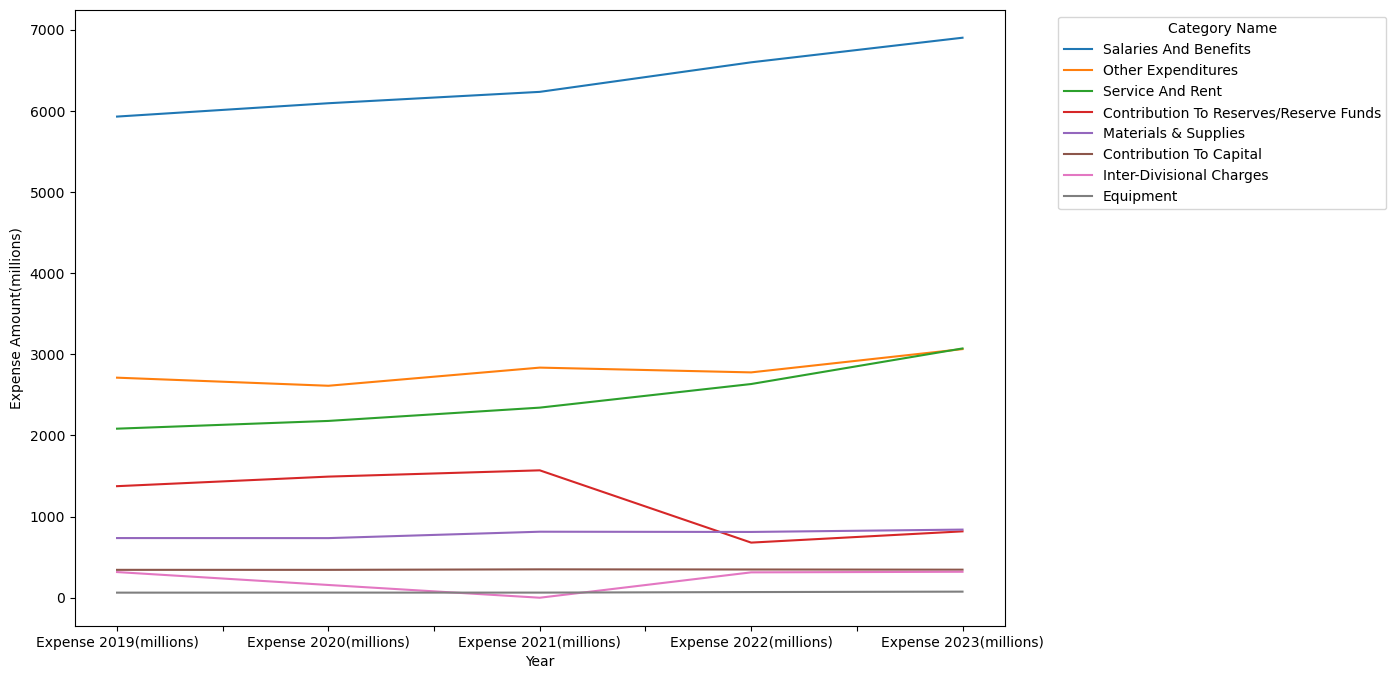

In [147]:
##Time series data of expense amount over the years for different categories
time_series_data = merged_df_ak_final.set_index('Category Name').T
time_series_data.plot(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Expense Amount(millions)')
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

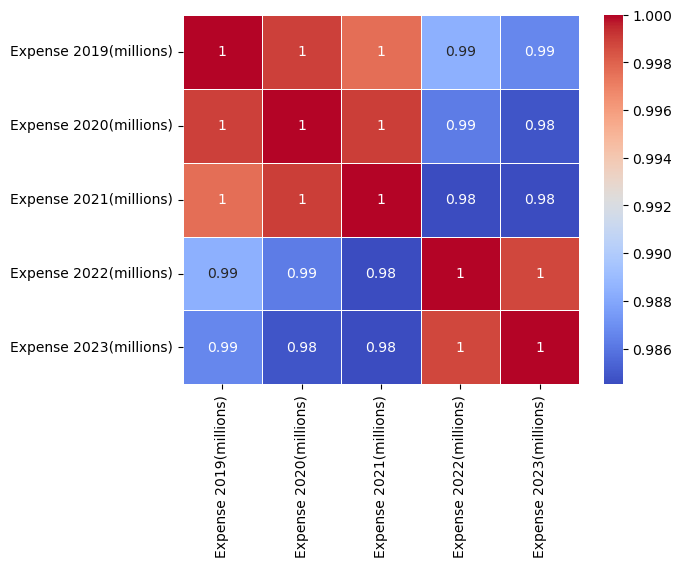

In [148]:
##Correlation matrix of Expense Amount using Seaborn

# Select only numeric columns
numeric_columns = merged_df_ak_final.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

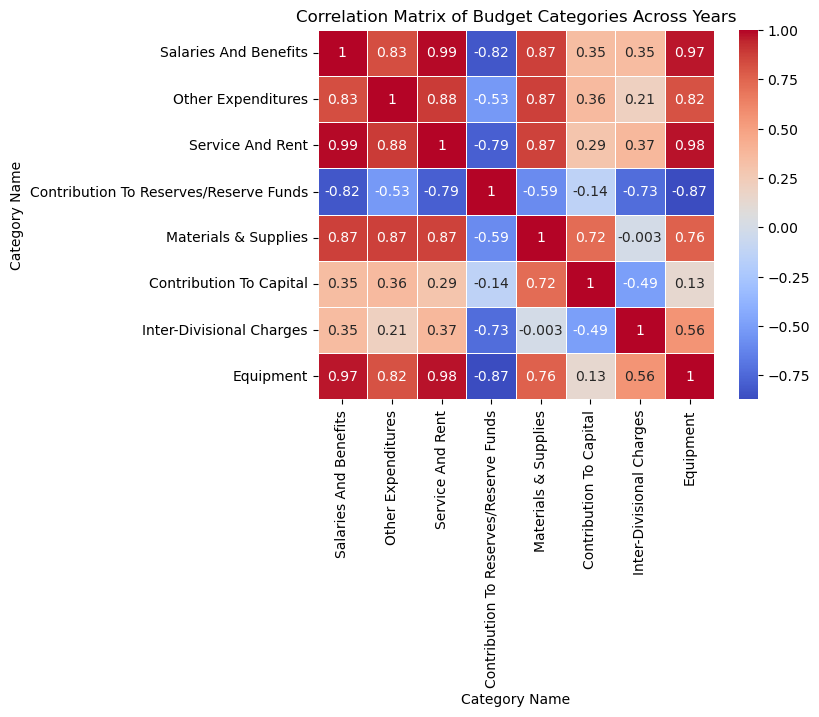

In [149]:
##Correlation matrix of budget categories across different years

# Transpose the DataFrame so that categories are rows and years are columns
transposed_df = merged_df_ak_final.set_index('Category Name').T

# Calculate the correlation matrix
correlation_matrix = transposed_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix of Budget Categories Across Years")
plt.show()

In [150]:
##Linear Regression Between Salaries and Benefits over Years

#Analysing ten years data here
#Reading data from downloaded excel files

budget_path_2014 = Path("approved-operating-budget-summary-2014.xlsx") #2014
budget2014_df = pd.read_excel(budget_path_2014, sheet_name='2014')
budget_path_2015 = Path("approved-operating-budget-summary-2015.xlsx") #2015
budget2015_df = pd.read_excel(budget_path_2015, sheet_name='summary')
budget_path_2016 = Path("approved-operating-budget-summary-2016.xlsx") #2016
budget2016_df = pd.read_excel(budget_path_2016, sheet_name='Open Data Summary')
budget_path_2017 = Path("approved-operating-budget-summary-2017.xlsx") #2017
budget2017_df = pd.read_excel(budget_path_2017, sheet_name='2017')
budget_path_2018 = Path("approved-operating-budget-summary-2018.xlsx") #2018
budget2018_df = pd.read_excel(budget_path_2018, sheet_name='2018')

#Renaming the columns
budget2014_df.rename(columns={2014.0: 'Budgeted amount 2014'}, inplace=True)
budget2015_df.rename(columns={2015.0: 'Budgeted amount 2015'}, inplace=True)
budget2016_df.rename(columns={2016.0: 'Budgeted amount 2016'}, inplace=True)
budget2017_df.rename(columns={2017.0: 'Budgeted amount 2017'}, inplace=True)
budget2018_df.rename(columns={2018.0: 'Budgeted amount 2018'}, inplace=True)

#Dropping duplicates
budget2014_df.drop_duplicates(subset = 'Budgeted amount 2014')
budget2015_df.drop_duplicates(subset = 'Budgeted amount 2015')
budget2016_df.drop_duplicates(subset = 'Budgeted amount 2016')
budget2017_df.drop_duplicates(subset = 'Budgeted amount 2017')
budget2018_df.drop_duplicates(subset = 'Budgeted amount 2018')

#Categorising between expense and revenue DataFrame
budget2014_df_exp = budget2014_df[budget2014_df['Expense/Revenue']=='Expenses']
budget2014_df_rev = budget2014_df[budget2014_df['Expense/Revenue']=='Revenues']
budget2015_df_exp = budget2015_df[budget2015_df['Expense/Revenue']=='Expenses']
budget2015_df_rev = budget2015_df[budget2015_df['Expense/Revenue']=='Revenues']
budget2016_df_exp = budget2016_df[budget2016_df['Expense/Revenue']=='Expenses']
budget2016_df_rev = budget2016_df[budget2016_df['Expense/Revenue']=='Revenues']
budget2017_df_exp = budget2017_df[budget2017_df['Expense/Revenue']=='Expenses']
budget2017_df_rev = budget2017_df[budget2017_df['Expense/Revenue']=='Revenues']
budget2018_df_exp = budget2018_df[budget2018_df['Expense/Revenue']=='Expenses']
budget2018_df_rev = budget2018_df[budget2018_df['Expense/Revenue']=='Revenues']

/Users/anuradhakishore/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [151]:
# Filtering rows where the "Category Name" is "Salaries And Benefits"
ak_2014_s= round(budget2014_df_exp[budget2014_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2014"].sum()/1000000,2)
ak_2015_s= round(budget2015_df_exp[budget2015_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2015"].sum()/1000000,2)
ak_2016_s = round(budget2016_df_exp[budget2016_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2016"].sum()/1000000,2)
ak_2017_s = round(budget2017_df_exp[budget2017_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2017"].sum()/1000000,2)
ak_2018_s= round(budget2018_df_exp[budget2018_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2018"].sum()/1000000,2)
ak_2019_s= round(budget2019_df_exp[budget2019_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2019"].sum()/1000000,2)
ak_2020_s= round(budget2020_df_exp[budget2020_df_exp["Category Name"] == "SService And Rent"]["Budgeted amount 2020"].sum()/1000000,2)
ak_2021_s = round(budget2021_df_exp[budget2021_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2021"].sum() / 1000000, 2)
ak_2022_s = round(budget2022_df_exp[budget2022_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2022"].sum() / 1000000, 2)
ak_2023_s = round(budget2023_df_exp[budget2023_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2023"].sum() / 1000000, 2)

In [152]:
##Linear Regression Between Salaries and Benefits over Years

#Defining the new ten year for calculation
years2 = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Initialize an empty dictionary to store the results
ak_values = {}

# Iterate over the years
for year in years2:
    # Construct the DataFrame variable name
    df_variable_name = f"budget{year}_df_exp"
    
    # Check if the DataFrame variable exists
    if df_variable_name in locals():
        # Use the DataFrame variable to calculate the sum
        if year in (2021, 2022, 2023):  # Use 'in' to check membership in the tuple
            ak_value = round(locals()[df_variable_name][(locals()[df_variable_name]["Category Name"] == "Salaries") | (locals()[df_variable_name]["Category Name"] == "Benefits")][f"Budgeted amount {year}"].sum() / 1000000, 2)
        else:
            ak_value = round(locals()[df_variable_name][(locals()[df_variable_name]["Category Name"] == "Salaries And Benefits")][f"Budgeted amount {year}"].sum() / 1000000, 2)
        
        # Store the result in the dictionary
        ak_values[f"ak_{year}"] = ak_value
print("Salary and Benfits in Ten years")
# Display the results
for key, value in ak_values.items():
    print(f"{key}: {value}")

Salary and Benfits in Ten years
ak_2014: 5088.15
ak_2015: 5306.23
ak_2016: 5442.21
ak_2017: 5526.44
ak_2018: 5688.31
ak_2019: 5928.05
ak_2020: 6092.48
ak_2021: 6232.59
ak_2022: 6596.59
ak_2023: 6899.58


r-squared value is 0.9736713941983182
Linear Regression: 189.24x + -376107.61


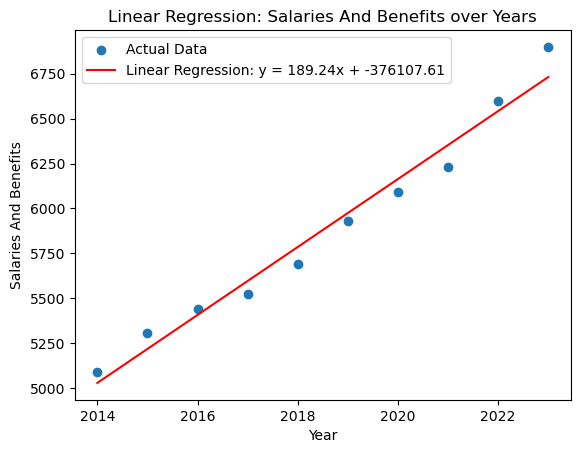

In [153]:
##Linear Regression Between Salaries and Benefits over Years

salaries_and_benefits_data = list(ak_values.values())

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(years2, salaries_and_benefits_data)

# Create the regression line
regress_values = [slope * year + intercept for year in years2]

# Plot the data and regression line
plt.scatter(years2, salaries_and_benefits_data, label='Actual Data', marker='o')
plt.plot(years2, regress_values, label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}', color="red")

# Add labels and legend
plt.title('Linear Regression: Salaries And Benefits over Years')
plt.xlabel('Year')
plt.ylabel('Salaries And Benefits')
plt.legend()
print(f"r-squared value is {r_value**2}")
print(f'Linear Regression: {slope:.2f}x + {intercept:.2f}')

# Show the plot
plt.show()

# Analysing Sub Categories

In [154]:
##Creating Datasets for 2019-2023 for Sub Category

sub_ak_2019 = budget2019_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2019"].sum().reset_index()
max_row_ak_2019 = sub_ak_2019.loc[sub_ak_2019["Budgeted amount 2019"].idxmax()]
min_row_ak_2019 = sub_ak_2019.loc[sub_ak_2019["Budgeted amount 2019"].idxmin()]
sort_ak_2019=(sub_ak_2019.sort_values("Budgeted amount 2019",ascending=False))

sub_ak_2020 = budget2020_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2020"].sum().reset_index()
max_row_ak_2020 = sub_ak_2020.loc[sub_ak_2020["Budgeted amount 2020"].idxmax()]
min_row_ak_2020 = sub_ak_2020.loc[sub_ak_2020["Budgeted amount 2020"].idxmin()]
sort_ak_2020=(sub_ak_2020.sort_values("Budgeted amount 2020",ascending=False))

sub_ak_2021 = budget2021_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2021"].sum().reset_index()
max_row_ak_2021 = sub_ak_2021.loc[sub_ak_2021["Budgeted amount 2021"].idxmax()]
min_row_ak_2021 = sub_ak_2021.loc[sub_ak_2021["Budgeted amount 2021"].idxmin()]
sort_ak_2021=(sub_ak_2021.sort_values("Budgeted amount 2021",ascending=False))

sub_ak_2022 = budget2022_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2022"].sum().reset_index()
max_row_ak_2022 = sub_ak_2022.loc[sub_ak_2022["Budgeted amount 2022"].idxmax()]
min_row_ak_2022 = sub_ak_2022.loc[sub_ak_2022["Budgeted amount 2022"].idxmin()]
sort_ak_2022=(sub_ak_2022.sort_values("Budgeted amount 2022",ascending=False))

sub_ak_2023 = budget2023_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2023"].sum().reset_index()
max_row_ak_2023 = sub_ak_2023.loc[sub_ak_2023["Budgeted amount 2023"].idxmax()]
min_row_ak_2023 = sub_ak_2023.loc[sub_ak_2023["Budgeted amount 2023"].idxmin()]
sort_ak_2023=(sub_ak_2023.sort_values("Budgeted amount 2023",ascending=False))



for year in years:
    print(f"Year {year}: Maximum Expense in Sub-Category along with Category Name and Expense Amount")
    print(globals()[f"max_row_ak_{year}"])
    print("--------------------------------------------------------------------------------------")
    
    print(f"Year {year}: Minimum Expense in Sub-Category along with Category Name and Expense Amount")
    print(globals()[f"min_row_ak_{year}"])
    print("--------------------------------------------------------------------------------------")

Year 2019: Maximum Expense in Sub-Category along with Category Name and Expense Amount
Category Name           Salaries And Benefits
Sub-Category Name          Permanent Salaries
Budgeted amount 2019            4565806999.47
Name: 30, dtype: object
--------------------------------------------------------------------------------------
Year 2019: Minimum Expense in Sub-Category along with Category Name and Expense Amount
Category Name           Salaries And Benefits
Sub-Category Name                     Gapping
Budgeted amount 2019            -195676588.65
Name: 27, dtype: object
--------------------------------------------------------------------------------------
Year 2020: Maximum Expense in Sub-Category along with Category Name and Expense Amount
Category Name           Salaries And Benefits
Sub-Category Name          Permanent Salaries
Budgeted amount 2020            4704520880.64
Name: 30, dtype: object
-------------------------------------------------------------------------------

# Analysing Revenue

In [155]:
#Coverting all negative values to positive: only for calculation purpose
#this code has been transformed from google sources

numeric_columns = budget2019_df_rev.select_dtypes(include='number')
budget2019_df_rev.loc[:, numeric_columns.columns] = budget2019_df_rev.loc[:, numeric_columns.columns].abs()

numeric_columns = budget2020_df_rev.select_dtypes(include='number')
budget2020_df_rev.loc[:, numeric_columns.columns] = budget2020_df_rev.loc[:, numeric_columns.columns].abs()

numeric_columns = budget2021_df_rev.select_dtypes(include='number')
budget2021_df_rev.loc[:, numeric_columns.columns] = budget2021_df_rev.loc[:, numeric_columns.columns].abs()

numeric_columns = budget2022_df_rev.select_dtypes(include='number')
budget2022_df_rev.loc[:, numeric_columns.columns] = budget2022_df_rev.loc[:, numeric_columns.columns].abs()

numeric_columns = budget2023_df_rev.select_dtypes(include='number')
budget2023_df_rev.loc[:, numeric_columns.columns] = budget2023_df_rev.loc[:, numeric_columns.columns].abs()

In [156]:
##Calculating Category wise total Revenue amount and storing it in DataFrame

# Create an empty dictionary to store DataFrames for each year based on Category and Revenue Amount
category_dfs_ak_rev = []


#Iterating for storing all revenue amount data in a new dataframe
for year in years:
    budget_df_rev = globals()[f"budget{year}_df_rev"]
    category_df_rev = budget_df_rev.groupby("Category Name")[f"Budgeted amount {year}"].sum().reset_index()
    category_dfs_ak_rev.append(category_df_rev)
    

#Merging all the revenue data into a single dataframe

# Merge Year 2019 and Year 2020 on "Category Name"
merged_df_ak_rev = pd.merge(category_dfs_ak_rev[0], category_dfs_ak_rev[1], on="Category Name", how="outer")

# Merge Year 2019 and Year 2020 on "Category Name"
merged_df_ak_rev = pd.merge(merged_df_ak_rev, category_dfs_ak_rev[2], on="Category Name", how="outer")

# Merge Year 2019 and Year 2020 on "Category Name"
merged_df_ak_rev = pd.merge(merged_df_ak_rev, category_dfs_ak_rev[3], on="Category Name", how="outer")

# Merge Year 2019 and Year 2020 on "Category Name"
merged_df_ak_rev = pd.merge(merged_df_ak_rev, category_dfs_ak_rev[4], on="Category Name", how="outer")

merged_df_ak_rev


,Category Name,Budgeted amount 2019,Budgeted amount 2020,Budgeted amount 2021,Budgeted amount 2022,Budgeted amount 2023
0,Contribution From Reserves/Reserve Funds,5.416717e+08,5.230802e+08,5.267769e+08,6.126027e+08,7.260764e+08
1,Federal Subsidies,2.143136e+08,2.513977e+08,2.883508e+08,2.875820e+08,9.155041e+08
2,Inter-Divisional Recoveries,3.161485e+08,1.572818e+08,NaN,3.124781e+08,3.197343e+08
3,Licences & Permits Revenue,1.389864e+08,1.416429e+08,NaN,NaN,NaN
4,Other Subsidies,8.450810e+06,1.813821e+07,NaN,NaN,NaN
5,Provincial Subsidies,2.420082e+09,2.222765e+09,3.847996e+09,3.805709e+09,3.357879e+09
6,Sundry and Other Revenues,7.322785e+09,7.630285e+09,NaN,NaN,NaN
7,Transfers From Capital,2.069584e+08,2.788116e+08,1.923544e+08,2.071879e+08,2.297670e+08
8,User Fees & Donations,2.384165e+09,2.449051e+09,1.624933e+09,1.973689e+09,2.239722e+09
9,Other Revenue,NaN,NaN,7.724641e+09,8.029163e+09,8.679280e+09


In [157]:
# Rounding off the budget amount to millions (10^6)

# Define a function to divide numbers by 10^6 and round to 3 decimal places
divide_and_round_ak_rev = lambda x: round(float(x) / 1e6, 2) if pd.to_numeric(x, errors='coerce') == x else str(x)

# Apply the division and rounding function to all columns in the DataFrame
merged_df_ak_final_rev = merged_df_ak_rev.applymap(divide_and_round_ak_rev)

#Renaming the column as Expense and year
merged_df_ak_final_rev=merged_df_ak_final_rev.rename(columns={
      "Category Name":"Category Name",
      "Budgeted amount 2019":"Revenue 2019(millions)",
      "Budgeted amount 2020":"Revenue 2020(millions)",
      "Budgeted amount 2021":"Revenue 2021(millions)",
      "Budgeted amount 2022":"Revenue 2022(millions)",
      "Budgeted amount 2023":"Revenue 2023(millions)"
    
})
merged_df_ak_final_rev

,Category Name,Revenue 2019(millions),Revenue 2020(millions),Revenue 2021(millions),Revenue 2022(millions),Revenue 2023(millions)
0,Contribution From Reserves/Reserve Funds,541.67,523.08,526.78,612.6,726.08
1,Federal Subsidies,214.31,251.4,288.35,287.58,915.5
2,Inter-Divisional Recoveries,316.15,157.28,nan,312.48,319.73
3,Licences & Permits Revenue,138.99,141.64,nan,nan,nan
4,Other Subsidies,8.45,18.14,nan,nan,nan
5,Provincial Subsidies,2420.08,2222.77,3848.0,3805.71,3357.88
6,Sundry and Other Revenues,7322.78,7630.29,nan,nan,nan
7,Transfers From Capital,206.96,278.81,192.35,207.19,229.77
8,User Fees & Donations,2384.16,2449.05,1624.93,1973.69,2239.72
9,Other Revenue,nan,nan,7724.64,8029.16,8679.28


In [158]:
##DataCleaning of Above Data, Clearing NaN


# Replace 'nan' strings with actual NaN values
merged_df_ak_final_rev.replace('nan', pd.NA, inplace=True)

# Replace NaN values with 0
merged_df_ak_final_rev.fillna(0, inplace=True)

#Adding the values for "Other Revenue" to row "Sundry and Other Revenues"
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Sundry and Other Revenues', 'Revenue 2021(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Revenue', 'Revenue 2021(millions)'].values[0]
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Sundry and Other Revenues', 'Revenue 2022(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Revenue', 'Revenue 2022(millions)'].values[0]
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Sundry and Other Revenues', 'Revenue 2023(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Revenue', 'Revenue 2023(millions)'].values[0]


#Adding the values for "Other Subsidies" to row "Provincial Subsidies" and renamin the columns to "Provincial and Other Subsidies"
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Provincial Subsidies', 'Revenue 2019(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Subsidies', 'Revenue 2019(millions)'].values[0]+merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Provincial Subsidies', 'Revenue 2019(millions)'].values[0]
merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Provincial Subsidies', 'Revenue 2020(millions)'] = merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Other Subsidies', 'Revenue 2020(millions)'].values[0]+merged_df_ak_final_rev.loc[merged_df_ak_final_rev['Category Name'] == 'Provincial Subsidies', 'Revenue 2020(millions)'].values[0]


#Renaming "Provincial Subsidies" to "Provincial and Other Subsidies"
merged_df_ak_final_rev=merged_df_ak_final_rev.rename(columns={
                "Provincial Subsidies":"Provincial and Other Subsidies"
    
})

#Dropping the row 4 and 9, because this has been already added to the other rows
merged_df_ak_final_rev=merged_df_ak_final_rev.drop([4,9])
merged_df_ak_final_rev

,Category Name,Revenue 2019(millions),Revenue 2020(millions),Revenue 2021(millions),Revenue 2022(millions),Revenue 2023(millions)
0,Contribution From Reserves/Reserve Funds,541.67,523.08,526.78,612.60,726.08
1,Federal Subsidies,214.31,251.40,288.35,287.58,915.50
2,Inter-Divisional Recoveries,316.15,157.28,0.00,312.48,319.73
3,Licences & Permits Revenue,138.99,141.64,0.00,0.00,0.00
5,Provincial Subsidies,2428.53,2240.91,3848.00,3805.71,3357.88
6,Sundry and Other Revenues,7322.78,7630.29,7724.64,8029.16,8679.28
7,Transfers From Capital,206.96,278.81,192.35,207.19,229.77
8,User Fees & Donations,2384.16,2449.05,1624.93,1973.69,2239.72


In [159]:
#Sorting the above Dataframe based on highest revenue on top 

# Extract the non-numeric columns (assuming the first column is non-numeric)
non_numeric_columns_rev = merged_df_ak_final_rev.columns[1:]

# Convert non-numeric values to NaN and then sum each row
merged_df_ak_final_rev['Total'] = merged_df_ak_final_rev[non_numeric_columns_rev].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Sort the DataFrame based on the "Total" column in descending order
merged_df_ak_final_rev = merged_df_ak_final_rev.sort_values("Total", ascending=False)

# Display the updated and sorted DataFrame
merged_df_ak_final_rev=merged_df_ak_final_rev.drop(['Total'], axis=1)

merged_df_ak_final_rev

,Category Name,Revenue 2019(millions),Revenue 2020(millions),Revenue 2021(millions),Revenue 2022(millions),Revenue 2023(millions)
6,Sundry and Other Revenues,7322.78,7630.29,7724.64,8029.16,8679.28
5,Provincial Subsidies,2428.53,2240.91,3848.00,3805.71,3357.88
8,User Fees & Donations,2384.16,2449.05,1624.93,1973.69,2239.72
0,Contribution From Reserves/Reserve Funds,541.67,523.08,526.78,612.60,726.08
1,Federal Subsidies,214.31,251.40,288.35,287.58,915.50
7,Transfers From Capital,206.96,278.81,192.35,207.19,229.77
2,Inter-Divisional Recoveries,316.15,157.28,0.00,312.48,319.73
3,Licences & Permits Revenue,138.99,141.64,0.00,0.00,0.00


In [160]:
#Calculating Year wise "Total Revenue" in millions

for year in years:
    column_name_rev = f"Revenue {year}(millions)"
    merged_df_ak_final_rev[column_name] = pd.to_numeric(merged_df_ak_final_rev[column_name_rev], errors='coerce')

total_2019_ak_rev = merged_df_ak_final_rev["Revenue 2019(millions)"].sum()
total_2020_ak_rev = merged_df_ak_final_rev["Revenue 2020(millions)"].sum()
total_2021_ak_rev = merged_df_ak_final_rev["Revenue 2021(millions)"].sum()
total_2022_ak_rev = merged_df_ak_final_rev["Revenue 2022(millions)"].sum()
total_2023_ak_rev = merged_df_ak_final_rev["Revenue 2023(millions)"].sum()

# Create a DataFrame with the totals
total_df_ak_rev = pd.DataFrame([
    {"Year": "2019", "Total Revenue(millions)": total_2019_ak_rev},
    {"Year": "2020", "Total Revenue(millions)": total_2020_ak_rev},
    {"Year": "2021", "Total Revenue(millions)": total_2021_ak_rev},
    {"Year": "2022", "Total Revenue(millions)": total_2022_ak_rev},
    {"Year": "2023", "Total Revenue(millions)": total_2023_ak_rev}
])
total_df_ak_rev=total_df_ak_rev.set_index("Year")
total_df_ak_rev

,Total Revenue(millions)
Year,
2019,13553.55
2020,13672.46
2021,14205.05
2022,15228.41
2023,16467.96


Text(0, 0.5, 'Total Revenue(in millions)')

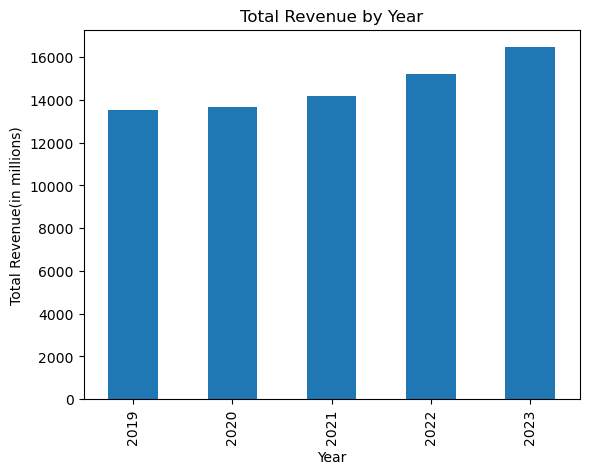

In [161]:
#Bar graph to show yearly change in Revenue in five years

graph3_ak_rev = total_df_ak_rev.plot(kind="bar", legend=False)

# Set plot title and labels
plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue(in millions)")

In [162]:
#Highest Revenue Category for each year

max_values_ak_rev = []
category_names_ak_rev = []

for year in years:
    max_value_ak_rev = merged_df_ak_final_rev[f"Revenue {year}(millions)"].max()
    category_name_ak_rev = merged_df_ak_final_rev.loc[merged_df_ak_final_rev[f"Revenue {year}(millions)"].idxmax(), "Category Name"]
    
    max_values_ak_rev.append(max_value_ak_rev)
    category_names_ak_rev.append(category_name_ak_rev)

high_df_ak_rev = pd.DataFrame({
    "Year": years,
    "Highest Category": category_names_ak_rev,
    "Revenue Amount": max_values_ak_rev
})

high_df_ak_rev

,Year,Highest Category,Revenue Amount
0,2019,Sundry and Other Revenues,7322.78
1,2020,Sundry and Other Revenues,7630.29
2,2021,Sundry and Other Revenues,7724.64
3,2022,Sundry and Other Revenues,8029.16
4,2023,Sundry and Other Revenues,8679.28


In [163]:
#Lowest Revenue Category for each year

#Filtering the value which are NaN or 0
filtered_df_ak_rev = merged_df_ak_final_rev.copy()
filtered_df_ak_rev.replace(0, np.nan, inplace=True)

#defining variables
min_values_ak_rev = []
category_names_ak_rev = []

for year in years:
    min_value_ak_rev = filtered_df_ak_rev[f"Revenue {year}(millions)"].min()
    category_name_ak_rev = filtered_df_ak_rev.loc[filtered_df_ak_rev[f"Revenue {year}(millions)"].idxmin(), "Category Name"]

    min_values_ak_rev.append(min_value_ak_rev)
    category_names_ak_rev.append(category_name_ak_rev)

low_df_ak_rev = pd.DataFrame({
    "Year": years,
    "Lowest Category": category_names_ak_rev,
    "Revenue Amount": min_values_ak_rev
})
low_df_ak_rev

,Year,Lowest Category,Revenue Amount
0,2019,Licences & Permits Revenue,138.99
1,2020,Licences & Permits Revenue,141.64
2,2021,Transfers From Capital,192.35
3,2022,Transfers From Capital,207.19
4,2023,Transfers From Capital,229.77


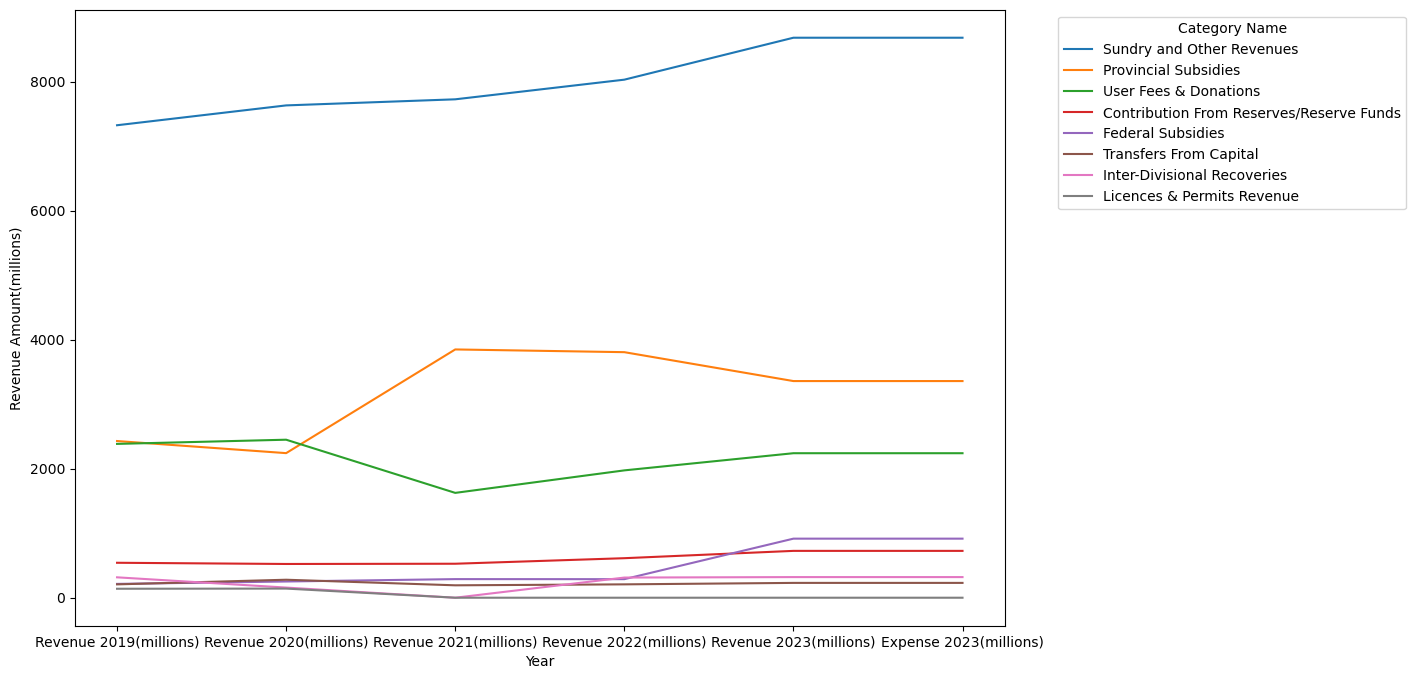

In [164]:
##Time series data of expense amount over the years for different categories

time_series_data_rev = merged_df_ak_final_rev.set_index('Category Name').T
time_series_data_rev.plot(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Revenue Amount(millions)')
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

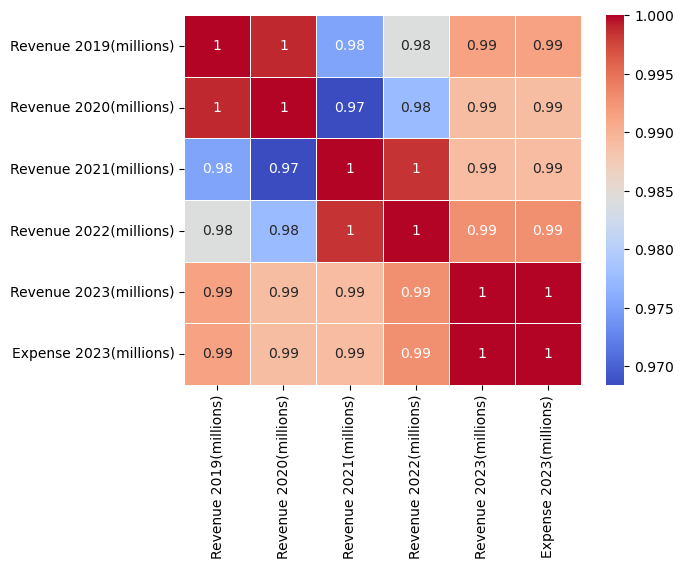

In [165]:
#Correlation matrix of Revenue Amount using Seaborn

import seaborn as sns

# Select only numeric columns
numeric_columns_rev = merged_df_ak_final_rev.select_dtypes(include='number')
correlation_matrix_rev = numeric_columns_rev.corr()

# Plot heatmap
sns.heatmap(correlation_matrix_rev, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

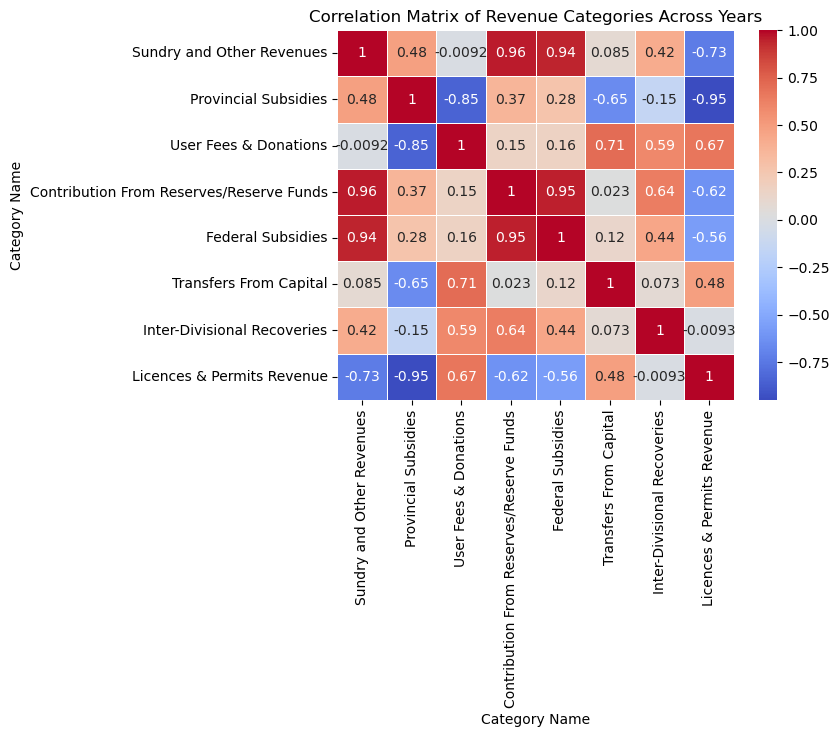

In [166]:
#Correlation matrix of budget categories across different years using Seaborn

# Transpose the DataFrame so that categories are rows and years are columns
transposed_df_rev = merged_df_ak_final_rev.set_index('Category Name').T

# Calculate the correlation matrix
correlation_matrix_rev_2 = transposed_df_rev.corr()

# Plot heatmap
sns.heatmap(correlation_matrix_rev_2, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix of Revenue Categories Across Years")
plt.show()

# Analysing Revenue-Sub Categories

In [167]:
sub_ak_2019_rev = budget2019_df_rev.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2019"].sum().reset_index()
max_row_ak_2019_rev = sub_ak_2019_rev.loc[sub_ak_2019_rev["Budgeted amount 2019"].idxmax()]
min_row_ak_2019_rev = sub_ak_2019_rev.loc[sub_ak_2019_rev["Budgeted amount 2019"].idxmin()]
sort_ak_2019_rev=(sub_ak_2019_rev.sort_values("Budgeted amount 2019",ascending=False))

sub_ak_2020_rev = budget2020_df_rev.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2020"].sum().reset_index()
max_row_ak_2020_rev = sub_ak_2020_rev.loc[sub_ak_2020_rev["Budgeted amount 2020"].idxmax()]
min_row_ak_2020_rev = sub_ak_2020_rev.loc[sub_ak_2020_rev["Budgeted amount 2020"].idxmin()]
sort_ak_2020_rev=(sub_ak_2020_rev.sort_values("Budgeted amount 2020",ascending=False))

sub_ak_2021_rev = budget2021_df_rev.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2021"].sum().reset_index()
max_row_ak_2021_rev = sub_ak_2021_rev.loc[sub_ak_2021_rev["Budgeted amount 2021"].idxmax()]
min_row_ak_2021_rev = sub_ak_2021_rev.loc[sub_ak_2021_rev["Budgeted amount 2021"].idxmin()]
sort_ak_2021_rev=(sub_ak_2021_rev.sort_values("Budgeted amount 2021",ascending=False))

sub_ak_2022_rev = budget2022_df_rev.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2022"].sum().reset_index()
max_row_ak_2022_rev = sub_ak_2022_rev.loc[sub_ak_2022_rev["Budgeted amount 2022"].idxmax()]
min_row_ak_2022_rev = sub_ak_2022_rev.loc[sub_ak_2022_rev["Budgeted amount 2022"].idxmin()]
sort_ak_2022_rev=(sub_ak_2022_rev.sort_values("Budgeted amount 2022",ascending=False))

sub_ak_2023_rev = budget2023_df_rev.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2023"].sum().reset_index()
max_row_ak_2023_rev = sub_ak_2023_rev.loc[sub_ak_2023_rev["Budgeted amount 2023"].idxmax()]
min_row_ak_2023_rev = sub_ak_2023_rev.loc[sub_ak_2023_rev["Budgeted amount 2023"].idxmin()]
sort_ak_2023_rev=(sub_ak_2023_rev.sort_values("Budgeted amount 2023",ascending=False))

In [168]:

for year in years:
    print(f"Year {year}: Maximum Revenue in Sub-Category along with Category Name and Revenue Amount")
    print(globals()[f"max_row_ak_{year}_rev"])
    print("--------------------------------------------------------------------------------------")
    print(f"Year {year}: Minimum Revenue in Sub-Category along with Category Name and Revenue Amount")
    print(globals()[f"min_row_ak_{year}_rev"])
    print("--------------------------------------------------------------------------------------")


Year 2019: Maximum Revenue in Sub-Category along with Category Name and Revenue Amount
Category Name           Sundry and Other Revenues
Sub-Category Name                        Taxation
Budgeted amount 2019                6499245765.57
Name: 10, dtype: object
--------------------------------------------------------------------------------------
Year 2019: Minimum Revenue in Sub-Category along with Category Name and Revenue Amount
Category Name           User Fees & Donations
Sub-Category Name                   Donations
Budgeted amount 2019               3329644.69
Name: 12, dtype: object
--------------------------------------------------------------------------------------
Year 2020: Maximum Revenue in Sub-Category along with Category Name and Revenue Amount
Category Name           Sundry and Other Revenues
Sub-Category Name                        Taxation
Budgeted amount 2020                6778107102.87
Name: 10, dtype: object
-------------------------------------------------------

In [169]:
##Comparison between Expense and Revenue based on Years


# Merge DataFrames on 'Year'
df_merged_ak = pd.merge(total_df_ak_rev, total_df_ak, on='Year', how='outer')
df_merged_ak = df_merged_ak.rename(columns={
    "Total Revenue(millions)_x": "Total Revenue(millions)",
    "Total Revenue(millions)_y": "Total Expense(millions)"
})

# Calculate Gain/Loss
df_merged_ak['Gain/Loss(millions)'] = df_merged_ak['Total Revenue(millions)'] - df_merged_ak['Total Expense(millions)']

# Display the result
df_merged_ak

,Total Revenue(millions),Total Expense(millions),Gain/Loss(millions)
Year,,,
2019,13553.55,13553.56,-0.01
2020,13672.46,13672.45,0.01
2021,14205.05,14205.06,-0.01
2022,15228.41,14225.06,1003.35
2023,16467.96,15431.14,1036.82
